# Building Open Source Geochemical Research Tools in Python

<a href="https://doi.org/10.5281/zenodo.3874952"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.3874952.svg" align="right" alt="doi: 10.5281/zenodo.3875779" style="padding: 0px 10px 10px 0px"></a>
<a href="https://github.com/morganjwilliams/gs2020-python4geochem/blob/master/LICENSE"><img src="https://img.shields.io/badge/License-MIT-blue.svg" align="right" alt="License: MIT" style="padding: 0px 10px 10px 0px"></a>

<span id='authors'><b>Morgan Williams <a class="fa fa-twitter" aria-hidden="true" href="https://twitter.com/metasomite" title="@metasomite"></a></b>, Louise Schoneveld, Steve Barnes and Jens Klump; </span>
<span id='affiliation'><em>CSIRO Mineral Resources</em></span>

### Contents

| [**Abstract**](./00_overview.ipynb) | **Introduction**  | [**Examples**](./00_overview.ipynb#Examples)  |
|:-----|:-----|:-----|
|  | [Software in Geochem](./00_overview.ipynb#Software-in-Geochemistry)  |  [pyrolite](./011_pyrolite.ipynb)  |
|  | [Development & Tools](./00_overview.ipynb#Development-Workflow-&-Tools) | [pyrolite-meltsutil](./012_pyrolite-meltsutil.ipynb) | 
|  |  | [interferences](./013_interferences.ipynb) | 
|  |  | [autopew](./014_autopew.ipynb) |  

## [pyrolite-meltsutil](https://github.com/morganjwilliams/pyrolite-meltsutil)

>  pyrolite-meltsutil is a pyrolite extension for working with alphaMELTS and its outputs.

[![PyPI](https://img.shields.io/pypi/v/pyrolite-meltsutil.svg?style=flat)](https://pypi.python.org/pypi/pyrolite-meltsutil)
[![Docs](https://readthedocs.org/projects/pyrolite-meltsutil/badge/?version=develop)](https://pyrolite-meltsutil.readthedocs.io/)

``pyrolite-meltsutil`` seeks to extend the capabilities of ``alphaMELTS`` and make the outputs easier to use for visualisation purposes. The python package includes functions to install and run melts with specific configurations,
to import output tables, and to visualise these results. ``alphaMELTS`` already includes batch calculation, capability, but this has been generalised slightly for ``pyrolite-meltsutil``, with batches configurable along the lines of:

```python
batch = MeltsBatch(
    MORB,
    default_config={  # things that won't change between experiments
        "Initial Temperature": 1400,
        "Final Temperature": 800,
        "modes": ["isobaric", "fractionate solids"],
    },
    config_grid={  # things that change between experiments
        "Initial Pressure": [5000, 7000],
        "Log fO2 Path": [None, "FMQ"],
        "modifychem": [None, {"H2O": 0.5}],
    },
    env=env,
    fromdir=experiment_dir,
)
```

Once configured this set of experiemnts can be run, and during execution a progress bar and estimated time to completion are shown for reference. Once complete, the output tables from the experiments are aggregated into two tables (typically named `system` and `phases`, respectively). Visualisation functions then use these tables as a starting point. 

In [1]:
%matplotlib inline
from pyrolite_meltsutil.util.general import get_data_example
from pyrolite_meltsutil.tables import import_tables

exp_dir = get_data_example("montecarlo/3149b39eee")
system, phases = import_tables(exp_dir)

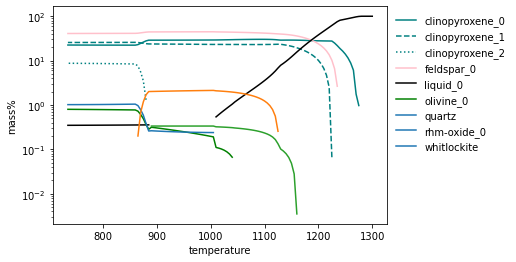

In [2]:
from pyrolite_meltsutil.vis.templates import plot_phasemasses

ax, proxies = plot_phasemasses(phases, marker=None)
ax.set_yscale("log")

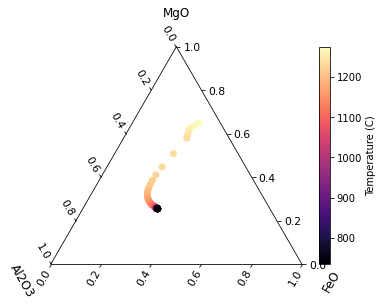

In [3]:
import matplotlib.pyplot as plt
import pyrolite.plot
from pyrolite.util.plot.style import mappable_from_values

chemvars = ["MgO", "Al2O3", "FeO"]
cumulate_comp = phases.loc[phases.phase == "cumulate", :]
ax = cumulate_comp.loc[:, chemvars].pyroplot.scatter(
    c=cumulate_comp.temperature, cmap="magma"
)
plt.colorbar(
    mappable_from_values(cumulate_comp.temperature.dropna(), cmap="magma"),
    label="Temperature (C)",
)

One interesting applicaiton of ``pyrolite-meltsutil`` is to investigate potential model uncertainty given uncertainties in either your input composition or model parameters. The following is an output from repeated isobaric crystallisation of a MORB composition (with added 'noise'), from [one of the ``pyrolite-meltsutil`` tutorials](https://pyrolite-meltsutil.readthedocs.io/en/develop/tutorials/montecarlo.html#sphx-glr-tutorials-montecarlo-py):

|   |
| - |
|<img src="img/sphx_glr_montecarlo_002.png" alt="Example of uncertainty with pyrolite-meltsutil." width=60%> |


Combined with some ``pyrolite`` functions for estimating sulfur content at sulfide/sulfate saturation, ``pyrolite-meltsutil`` can also be used to visualise estimates for timing fo sulfur saturaiton:

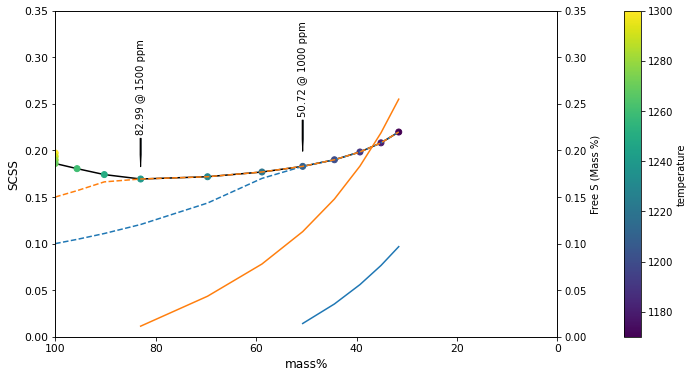

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pyrolite.plot
from pyrolite.geochem.magma import SCSS
from pyrolite_meltsutil.vis.scss import plot_sulfur_saturation_point
from pyrolite_meltsutil.util.general import get_data_example
from pyrolite_meltsutil.tables.load import import_tables, import_batch_config

hsh = "363f3d0a0b"  # the hash index of our experiment
batchdir = get_data_example("batch")  # let's use the example batch data for this
system, phases = import_tables(batchdir / hsh, kelvin=False)  # let's import the tables
name, cfg, env = import_batch_config(batchdir)[hsh]  # and also the configuration

liquid = phases.loc[phases.phase == "liquid", :]

sulfate, sulfide = SCSS(
    liquid, T=liquid.temperature, P=liquid.pressure / 1000, grid=None, kelvin=False
)
liquid.loc[:, "SCSS"] = sulfide

xvar, colorvar = "mass%", "temperature"

# show the SCSS for the liqud
ax = liquid.loc[:, [xvar, "SCSS"]].pyroplot.scatter(
    c=liquid[colorvar], fontsize=12, figsize=(12, 6)
)
plt.colorbar(mappable_from_values(liquid[colorvar]), ax=ax, pad=0.1, label=colorvar)
plot_sulfur_saturation_point(liquid, start=[1000, 1500], xvar=xvar, ax=ax)

ax.set_ylim(0, 0.35)
ax.set_xlim((np.nanmax(liquid["mass%"]), 0))
plt.show()

-----

| [**Abstract**](./00_overview.ipynb) | **Introduction**  | [**Examples**](./00_overview.ipynb#Examples)  |
|:-----|:-----|:-----|
|  | [Software in Geochem](./00_overview.ipynb#Software-in-Geochemistry)  |  [pyrolite](./011_pyrolite.ipynb)  |
|  | [Development & Tools](./00_overview.ipynb#Development-Workflow-&-Tools) | [pyrolite-meltsutil](./012_pyrolite-meltsutil.ipynb) | 
|  |  | [interferences](./013_interferences.ipynb) | 
|  |  | [autopew](./014_autopew.ipynb) |  